## Implementing of the Logistic Regression on Binary Classification Problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from PIL import Image

In [2]:
dataset=make_classification(n_samples=1000,n_features=4)

In [3]:
X=dataset[0]
y=dataset[1]

In [4]:
sc=StandardScaler()

In [5]:
X=sc.fit_transform(X)

In [6]:
X.shape

(1000, 4)

Text(0.5, 1.0, 'Classified All Data')

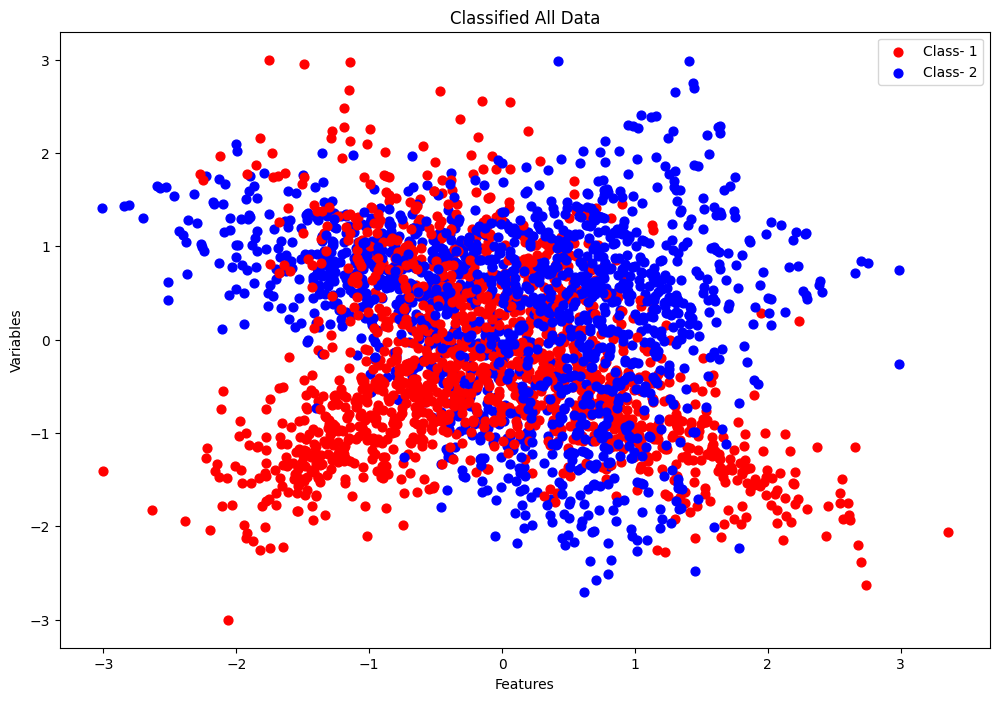

In [10]:
plt.figure(figsize=(12,8))
plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 40, c = 'red', label = 'Class- 1')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 40, c = 'blue', label = 'Class- 2')

plt.scatter(X[y == 0, 1], X[y == 0, 2], s = 40, c = 'red')
plt.scatter(X[y == 1, 1], X[y == 1, 2], s = 40, c = 'blue')

plt.scatter(X[y == 0, 2], X[y == 0, 3], s = 40, c = 'red')
plt.scatter(X[y == 1, 2], X[y == 1, 3], s = 40, c = 'blue')
plt.legend()
plt.xlabel('Features')
plt.ylabel('Variables')
plt.title('Classified All Data')

Text(0.5, 1.0, 'Unclassified All Data')

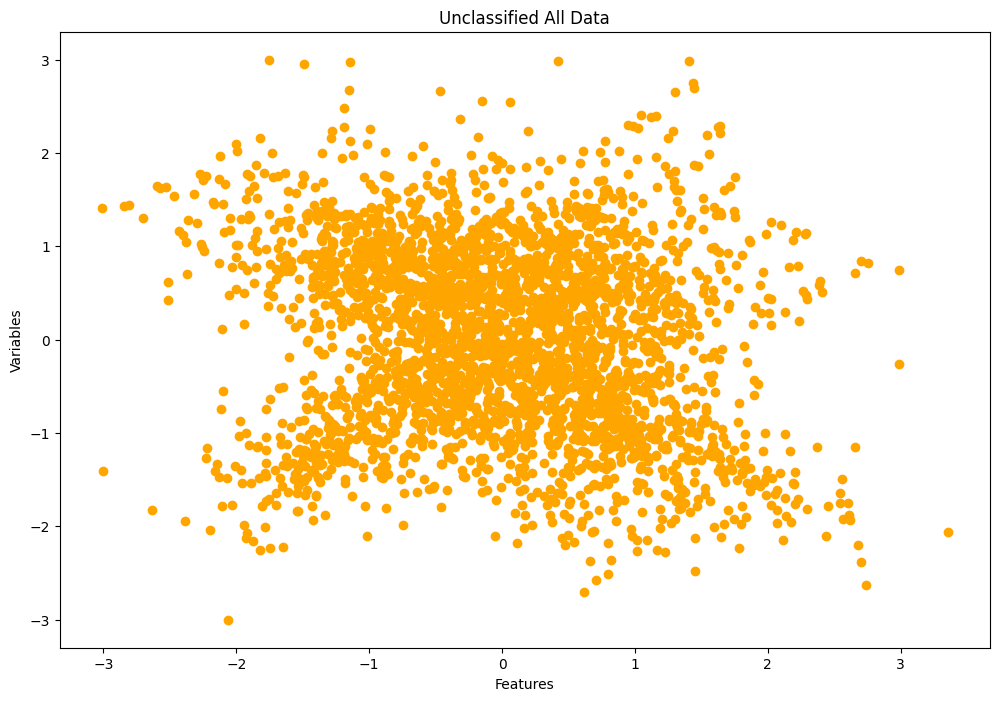

In [8]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1],c='orange')
plt.scatter(X[:,1],X[:,2],c='orange')
plt.scatter(X[:,2],X[:,3],c='orange')
plt.xlabel('Features')
plt.ylabel('Variables')
plt.title('Unclassified All Data')

#### Description of the Logistic Regression 

* **#1** Vandermonde matrix and weights are created in **initalize_params()**

* **#2** Cost is calculated with **cost_function_gradient()** in **gradient_descent()** method. 

    The local minimum point is tried to be obtained by multiplying the **learning _rate** and subtracting the weights throughout the loop.
    
* **#3** Weights are returned with the **fit()** method

* **#4** In the **make_predict()** method, the predicted value, called **e**, is found by multiplying the weights with X_test.

* **#5** It is returned as the **make_predict(X_test)** parameter inside **sigmoid_function()** in the **predict()** method.
    
    Since the logistic regression model calculates **probabilistic results**, 0.5 over 1 and 0.5 under 0 in the return part of the **predict()** method.

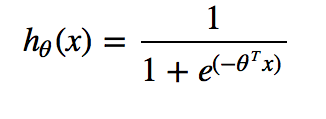

In [11]:
Image.open('Figures/sigmoid.png')

**sigmoid function**

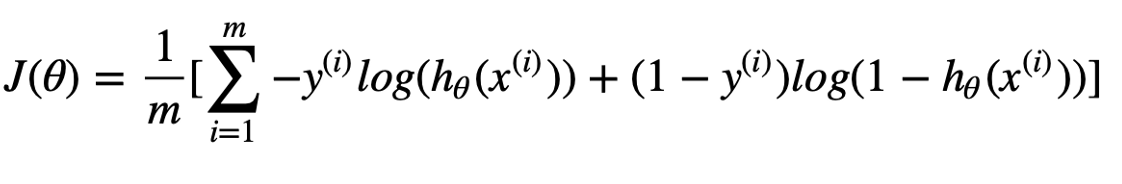

In [12]:
Image.open('Figures/log_reg_cost.png')

**cost function**

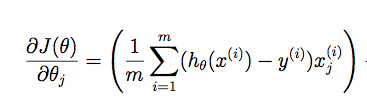

In [13]:
Image.open('Figures/log_reg_cost_gradient.png')

**gradient of the cost function**

* h_theta(x) : predicted y (ypred)
* theta : weights 

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [111]:
class LogisticRegression_mine():
    
    """ 
    
    Logistic Regression (aka logit, MaxEnt) classifier.
    
    Hyperparameters::
    
        learning_rate : float, default=0.001
        Used as learning rate.
        
        random_state: bool, default=None
        
        weights : numpy array, default=None
        
        To view the weights.
        
    Attributes::
        
        loss_list: numpy array
        
        intercept_: float 
        
        coef_: numpy array
        
    """
    
    
    def __init__(self,learning_rate=0.001,weights=None):
        
        self.learning_rate=learning_rate
        self.weights=weights
        
        self.loss_list=None
        self.intercept=None
        self.coef_=None
    
    def initialize_params(self,X):
    
        weights = np.random.rand(X.shape[1]+1,1)
        X = np.c_[np.ones((X.shape[0],1)),X] 
        
        return weights,X 
    
    def sigmoid_function(self,e): 
        
        return 1/(1+np.exp(-e))
    
    def loss_function(self,y,ypred): 
    
        return -(np.dot(y.transpose(),np.log(ypred))+np.dot((1-y).transpose(),np.log(1-ypred)))
    
    def cost_function_gradient(self,weights,X,y):
        
        return np.dot(X.transpose(),(self.sigmoid_function(np.dot(X,weights)))-y.reshape(-1,1))

            
    def gradient_descent(self,X,y):
        
        weights,X=self.initialize_params(X)
        
        epochs=100
        loss_list = np.zeros(len(X),)
        for i in range(epochs):
            for j in range(len(X)):

                cost=self.cost_function_gradient(weights,X,y)
                weights -= self.learning_rate*cost
            
                ypred=self.sigmoid_function(np.dot(X[j],weights))
                loss_list[j] = self.loss_function(y[j],ypred) 
                
        self.loss_list=loss_list
        self.intercept_=weights[0]
        self.coef_=weights[1:]
            
        return weights
    
    
    def fit(self,X,y):
        
        self.weights=self.gradient_descent(X,y)
        
    def make_predict(self,X):
        
        X=self.initialize_params(X)[1]
        e=np.dot(X,self.weights) 
        
        return e 

    def predict(self,X):
       
        ypred=self.sigmoid_function(self.make_predict(X))
        
        return np.array([1. if k>0.5 else 0. for k in ypred])

#### Hand-made Results

In [112]:
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,jaccard_score,roc_auc_score

In [113]:
model_mine=LogisticRegression_mine()

In [114]:
model_mine.fit(X_train,y_train)

In [115]:
yhat_mine=model_mine.predict(X_test)

In [116]:
model_mine.coef_,model_mine.intercept_

(array([[-0.78244987],
        [ 0.38867334],
        [ 2.61601495],
        [-0.25042058]]),
 array([0.06897561]))

In [118]:
f1_score(y_test,yhat_mine)

0.8518518518518519

In [119]:
accuracy_score(y_test,yhat_mine)

0.8545454545454545

In [120]:
jaccard_score(y_test,yhat_mine)

0.7419354838709677

In [121]:
roc_auc_score(y_test,yhat_mine)

0.8553135119222843

#### Plots Hand-made

In [122]:
import seaborn as sns 

[Text(0.5, 58.7222222222222, 'Actual Values'),
 Text(120.72222222222221, 0.5, 'Predicted Values')]

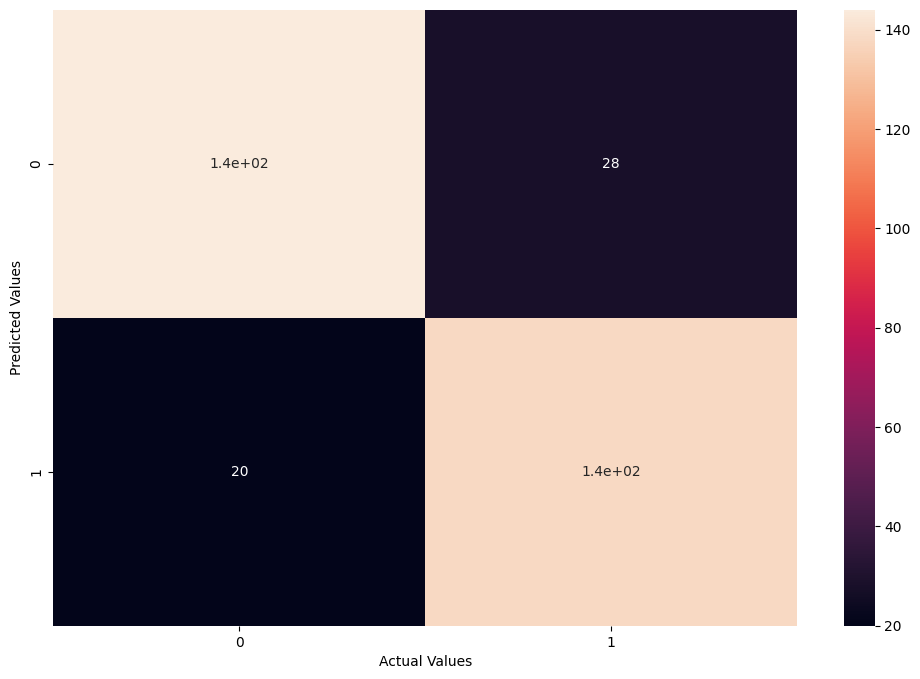

In [123]:
fig=plt.figure(figsize=(12,8))
fig=sns.heatmap(confusion_matrix(y_test,yhat_mine),annot=True)
fig.set(xlabel='Actual Values', ylabel='Predicted Values')

Text(0.5, 1.0, 'Loss vs Epochs')

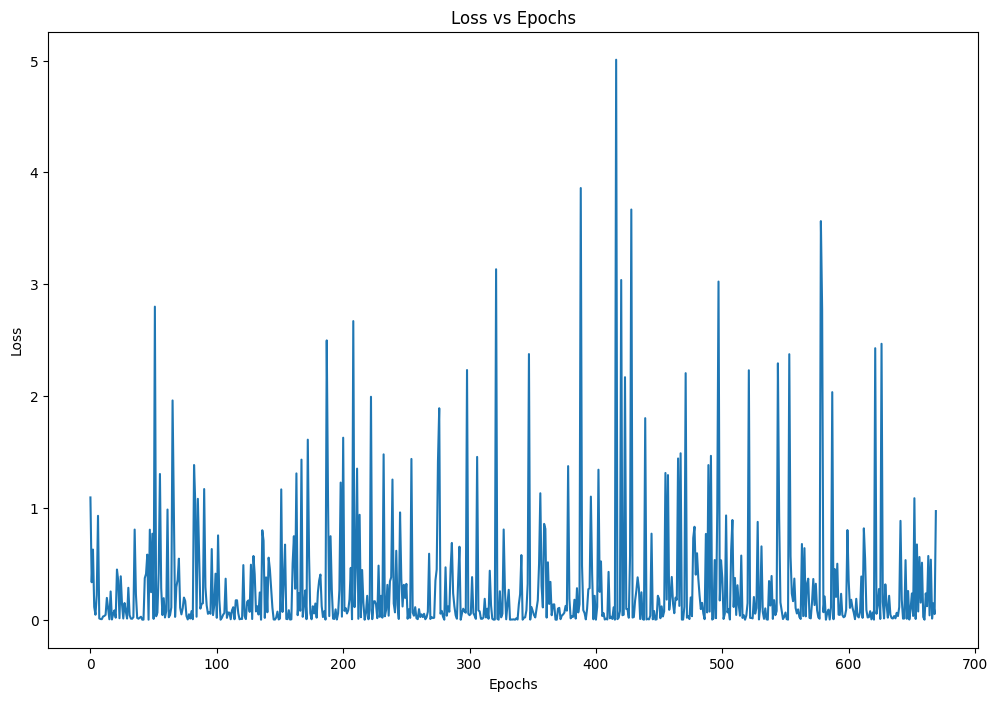

In [124]:
plt.figure(figsize=(12,8))
plt.plot(model_mine.loss_list)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')

Text(0.5, 1.0, 'Classified Predict Data (Hand-made)')

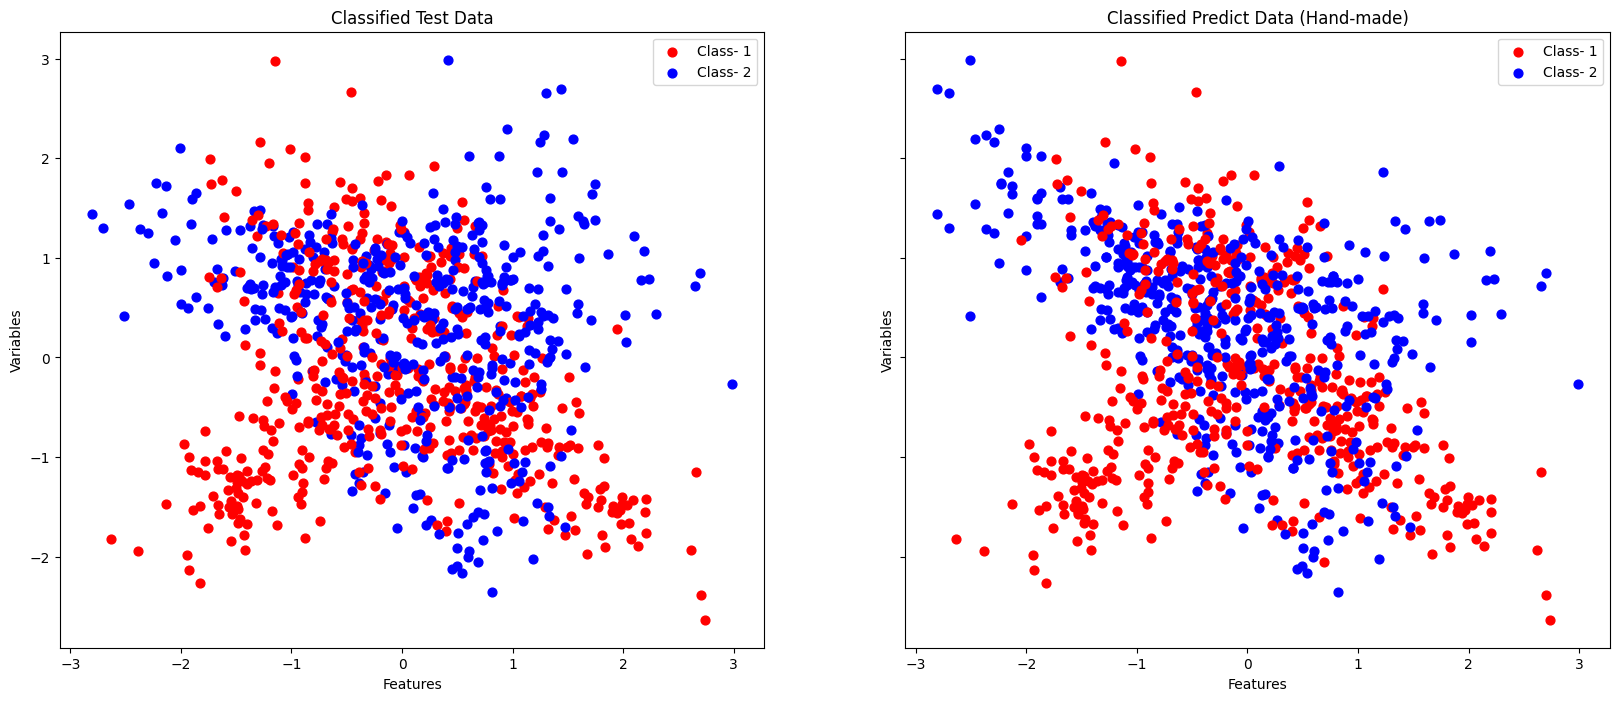

In [125]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(20,8))
ax1.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], s = 40, c ='r', label = 'Class- 1')
ax1.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], s = 40, c ='b', label = 'Class- 2')

ax1.scatter(X_test[y_test == 0, 1], X_test[y_test == 0, 2], s = 40, c ='r')
ax1.scatter(X_test[y_test == 1, 1], X_test[y_test == 1, 2], s = 40, c = 'b')

ax1.scatter(X_test[y_test == 0, 2], X_test[y_test == 0, 3], s = 40, c ='r')
ax1.scatter(X_test[y_test == 1, 2], X_test[y_test == 1, 3], s = 40, c = 'b')

ax1.legend()
ax1.set_xlabel('Features')
ax1.set_ylabel('Variables')
ax1.set_title('Classified Test Data')

ax2.scatter(X_test[yhat_mine == 0, 0], X_test[yhat_mine == 0, 1], s = 40, c ='r', label = 'Class- 1')
ax2.scatter(X_test[yhat_mine == 1, 0], X_test[yhat_mine == 1, 1], s = 40, c ='b', label = 'Class- 2')

ax2.scatter(X_test[yhat_mine == 0, 1], X_test[yhat_mine == 0, 2], s = 40, c ='r')
ax2.scatter(X_test[yhat_mine == 1, 0], X_test[yhat_mine == 1, 2], s = 40, c = 'b')

ax2.scatter(X_test[yhat_mine == 0, 2], X_test[yhat_mine == 0, 3], s = 40, c ='r')
ax2.scatter(X_test[yhat_mine == 1, 2], X_test[yhat_mine == 1, 3], s = 40, c = 'b')

ax2.legend()
ax2.set_xlabel('Features')
ax2.set_ylabel('Variables')
ax2.set_title('Classified Predict Data (Hand-made)')

#### Sklearn Results

In [126]:
from sklearn.linear_model import LogisticRegression

In [127]:
model=LogisticRegression()

In [128]:
%time model.fit(X_train,y_train)

CPU times: user 1.8 ms, sys: 1.37 ms, total: 3.17 ms
Wall time: 2.26 ms


LogisticRegression()

In [129]:
yhat_sklearn=model.predict(X_test)

In [130]:
model.coef_,model.intercept_

(array([[-1.51897593,  0.09354732,  1.91269707, -0.34769076]]),
 array([0.06774324]))

In [131]:
f1_score(y_test,yhat_sklearn)

0.8518518518518519

In [132]:
accuracy_score(y_test,yhat_sklearn)

0.8545454545454545

In [133]:
jaccard_score(y_test,yhat_sklearn)

0.7419354838709677

In [134]:
roc_auc_score(y_test,yhat_sklearn)

0.8553135119222843

#### Plots Sklearn

[Text(0.5, 58.7222222222222, 'Actual Values'),
 Text(120.72222222222221, 0.5, 'Predicted Values')]

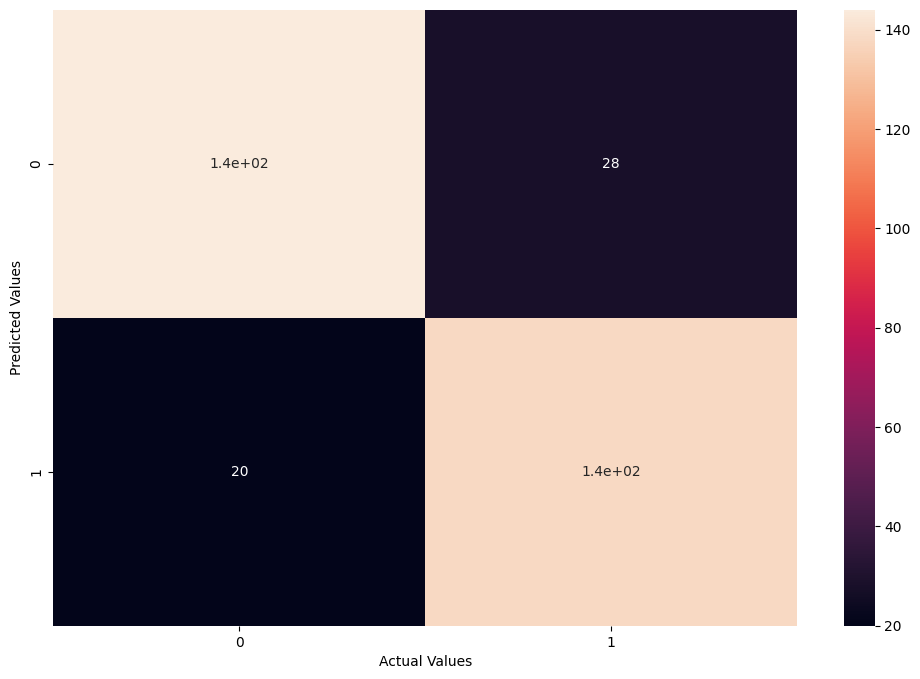

In [135]:
fig=plt.figure(figsize=(12,8))
fig=sns.heatmap(confusion_matrix(y_test,yhat_sklearn),annot=True)
fig.set(xlabel='Actual Values', ylabel='Predicted Values')

Text(0.5, 1.0, 'Classified Predict Data (Sklearn)')

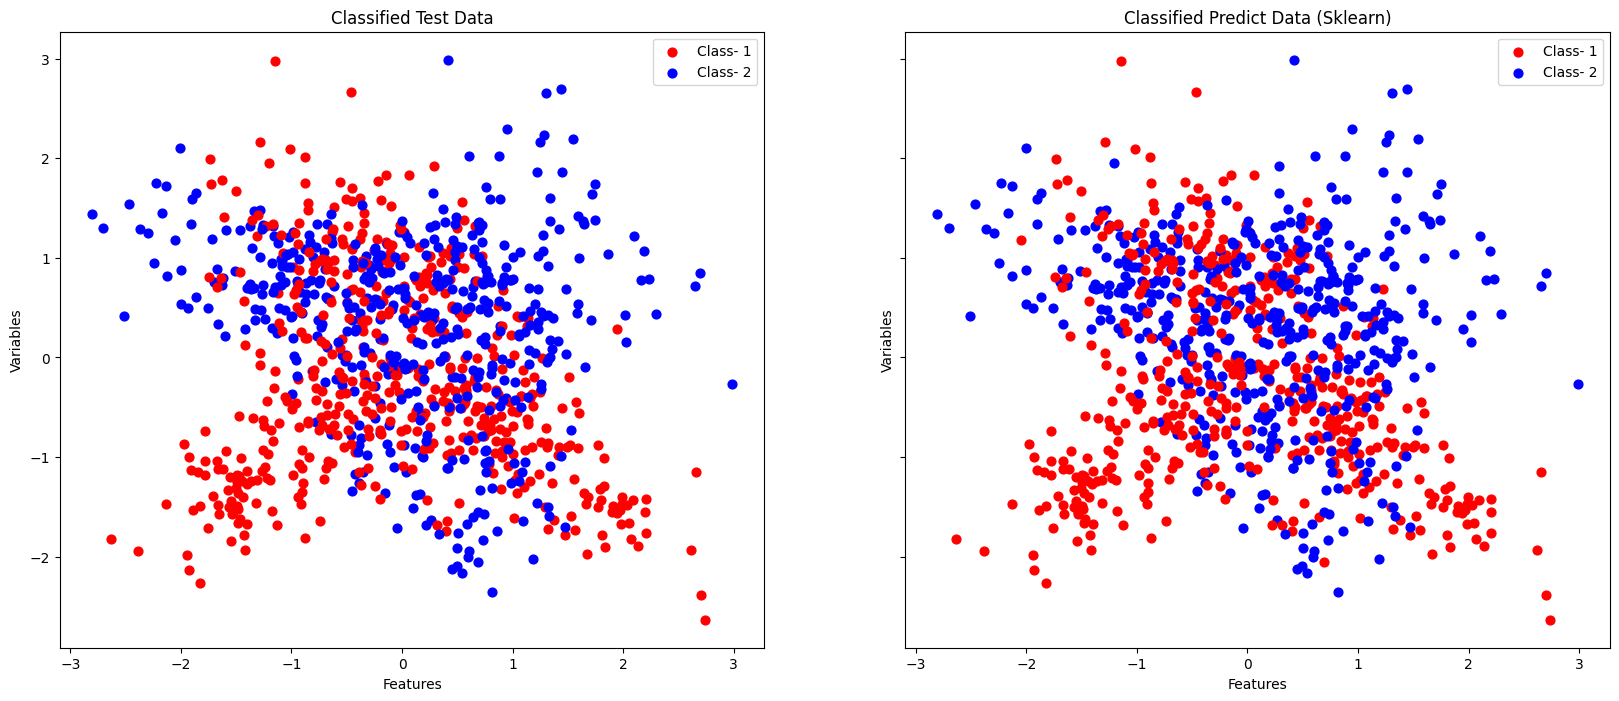

In [136]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(20,8))
ax1.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], s = 40, c ='r', label = 'Class- 1')
ax1.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], s = 40, c ='b', label = 'Class- 2')

ax1.scatter(X_test[y_test == 0, 1], X_test[y_test == 0, 2], s = 40, c ='r')
ax1.scatter(X_test[y_test == 1, 1], X_test[y_test == 1, 2], s = 40, c = 'b')

ax1.scatter(X_test[y_test == 0, 2], X_test[y_test == 0, 3], s = 40, c ='r')
ax1.scatter(X_test[y_test == 1, 2], X_test[y_test == 1, 3], s = 40, c = 'b')

ax1.legend()
ax1.set_xlabel('Features')
ax1.set_ylabel('Variables')
ax1.set_title('Classified Test Data')

ax2.scatter(X_test[yhat_sklearn== 0, 0], X_test[yhat_sklearn == 0, 1], s = 40, c ='r', label = 'Class- 1')
ax2.scatter(X_test[yhat_sklearn == 1, 0], X_test[yhat_sklearn == 1, 1], s = 40, c ='b', label = 'Class- 2')

ax2.scatter(X_test[yhat_sklearn == 0, 1], X_test[yhat_sklearn == 0, 2], s = 40, c ='r')
ax2.scatter(X_test[yhat_sklearn == 1, 1], X_test[yhat_sklearn == 1, 2], s = 40, c = 'b')

ax2.scatter(X_test[yhat_sklearn == 0, 2], X_test[yhat_sklearn == 0, 3], s = 40, c ='r')
ax2.scatter(X_test[yhat_sklearn == 1, 2], X_test[yhat_sklearn == 1, 3], s = 40, c = 'b')

ax2.legend()
ax2.set_xlabel('Features')
ax2.set_ylabel('Variables')
ax2.set_title('Classified Predict Data (Sklearn)')